In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize =(12,8))
import os
import datetime

import sys
np.set_printoptions(threshold=sys.maxsize)

<Figure size 1200x800 with 0 Axes>

In [2]:
!kaggle datasets download aiaiaidavid/the-big-dataset-of-ultra-marathon-running
!unzip /content/the-big-dataset-of-ultra-marathon-running.zip

Dataset URL: https://www.kaggle.com/datasets/aiaiaidavid/the-big-dataset-of-ultra-marathon-running
License(s): CC0-1.0
100% 246M/246M [00:08<00:00, 30.7MB/s]
100% 246M/246M [00:08<00:00, 28.7MB/s]
Archive:  /content/the-big-dataset-of-ultra-marathon-running.zip
  inflating: TWO_CENTURIES_OF_UM_RACES  
  inflating: TWO_CENTURIES_OF_UM_RACES.csv  


In [3]:
df = pd.read_csv('/content/TWO_CENTURIES_OF_UM_RACES.csv')
df.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
0,2018,06.01.2018,Selva Costera (CHI),50km,22,4:51:39 h,Tnfrc,CHI,1978.0,M,M35,10.286,0
1,2018,06.01.2018,Selva Costera (CHI),50km,22,5:15:45 h,Roberto Echeverría,CHI,1981.0,M,M35,9.501,1
2,2018,06.01.2018,Selva Costera (CHI),50km,22,5:16:44 h,Puro Trail Osorno,CHI,1987.0,M,M23,9.472,2
3,2018,06.01.2018,Selva Costera (CHI),50km,22,5:34:13 h,Columbia,ARG,1976.0,M,M40,8.976,3
4,2018,06.01.2018,Selva Costera (CHI),50km,22,5:54:14 h,Baguales Trail,CHI,1992.0,M,M23,8.469,4


# Data Analysis and Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7461195 entries, 0 to 7461194
Data columns (total 13 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   Year of event              int64  
 1   Event dates                object 
 2   Event name                 object 
 3   Event distance/length      object 
 4   Event number of finishers  int64  
 5   Athlete performance        object 
 6   Athlete club               object 
 7   Athlete country            object 
 8   Athlete year of birth      float64
 9   Athlete gender             object 
 10  Athlete age category       object 
 11  Athlete average speed      object 
 12  Athlete ID                 int64  
dtypes: float64(1), int64(3), object(9)
memory usage: 740.0+ MB


In [5]:
df.drop_duplicates(inplace = True)

In [6]:
# Extracting country codes

df['Event country code'] = df['Event name'].str[-4:-1]

df['Event country code'] = np.where(df['Event country code'] == 'n (', 'N/A', df['Event country code'])
unique_country_codes = df['Event country code'].unique()
unique_country_codes

array(['CHI', 'RUS', 'SLO', 'USA', 'NED', 'ITA', 'TPE', 'AUS', 'GBR',
       'HKG', 'CHN', 'GER', 'HUN', 'MEX', 'ESP', 'BRA', 'ISR', 'UAE',
       'BUL', 'DEN', 'FRA', 'BEL', 'GRE', 'COL', 'MAS', 'PHI', 'ARG',
       'INA', 'LTU', 'JPN', 'AUT', 'NOR', 'IRL', 'ROU', 'TUR', 'CRC',
       'NZL', 'RSA', 'SVK', 'GUA', 'VIE', 'PER', 'POL', 'POR', 'IND',
       'ECU', 'SWE', 'SRB', 'CAN', 'KOR', 'BLR', 'URU', 'PAR', 'CZE',
       'NCA', 'CAY', 'FIN', 'DOM', 'CYP', 'THA', 'UKR', 'IRI', 'CHA',
       'OMA', 'EST', 'CAM', 'SGP', 'ALG', 'MLT', 'MAD', 'MAR', 'NAM',
       'BIH', 'IVB', 'JOR', 'CRO', 'VEN', 'NEP', 'BRU', 'ESA', 'LUX',
       'SUI', 'ISL', 'BOL', 'MDA', 'MGL', 'BHU', 'MRI', 'KAZ', 'N/A',
       'LAT', 'KEN', 'AND', 'ALB', 'TUN', 'MKD', 'CPV', 'LES', 'MON',
       'EGY', 'MOZ', 'LAO', 'SRI', 'PUR', 'MLI', 'ZIM', 'KSA', 'QAT',
       'ARU', 'GRL', 'KOS', 'MNE', 'BOT', 'MYA', 'MTN', 'STP', 'GEO',
       'PAK', 'ATA', 'SEN', 'LBA', 'CMR', 'BUR', 'SEY', 'DJI', 'TRI',
       'GUM', 'PAN',

In [7]:
# Parsing event dates

def parse_date(date_str):
    try:
        return datetime.datetime.strptime(date_str, '%d.%m.%Y').date()
    except ValueError:
        try:
            date_str = date_str.split('.')[2]
            return datetime.datetime.strptime(date_str, '%Y').date()
        except ValueError:
            return None

df['Event dates'] = df['Event dates'].str[-10:]
df['Event dates'] = df['Event dates'].apply(parse_date)


In [8]:
# Extracting distance and performance

df=df.dropna(subset=['Event distance/length'])
df[['Performance','Distance']] = df[['Athlete performance','Event distance/length']].where((df['Athlete performance'].str.contains("h") | df['Athlete performance'].str.contains("d") ), df[['Event distance/length','Athlete performance']].values)
df=df.dropna(subset=['Distance'])


In [9]:
# Converting distances to km and same format

df['Distance'] = df['Distance'].str.lower()
df['Distance'] = df['Distance'].where(~(df['Distance'].str.contains("k") & (~df['Distance'].str.contains("m")) ), df['Distance'].str.replace("k", "km"))
df = df[(df['Distance'].str.contains('km')|df['Distance'].str.contains('mi'))]
df = df[~(df['Distance'].str.contains('km')&df['Distance'].str.contains(':'))]

def convert_to_km(distance_str):
    try:
        if 'mi' in distance_str:
            miles = float(distance_str.replace('mi', '').strip())
            return miles * 1.60934
        elif 'km' in distance_str:
            return float(distance_str.replace('km', '').strip())
        else:
            return float(distance_str)
    except (ValueError, AttributeError):
        return None


df['Distance'] = df['Distance'].astype(str).apply(convert_to_km)
df['Distance'] = df['Distance'].astype(float)

df = df.dropna(subset=['Distance'])

In [10]:
# Converting perfromance to the same format

def convert_performance(performance_str):
    try:
        if 'd' in performance_str and 'h' in performance_str and ':' in performance_str:
            days, time_str = performance_str.split('d')
            days = int(days)
            hours, minutes, seconds = map(int, time_str.replace('h', '').strip().split(':'))
            delta = datetime.timedelta(days=days, hours=hours, minutes=minutes, seconds=seconds)
        elif 'd' in performance_str and 'h' in performance_str:
            days, time_str = performance_str.split('d')
            days = int(days)
            hours = int(time_str.replace('h', '').strip())
            delta = datetime.timedelta(days=days, hours=hours)
        elif 'd' in performance_str:
            days = int(performance_str.replace('d', '').strip())
            delta = datetime.timedelta(days=days)
        elif 'h' in performance_str and ':' in performance_str:
            colon_count = performance_str.count(":")
            if colon_count == 2:
                hours, minutes, seconds = map(int, performance_str.replace('h', '').strip().split(':'))
            elif colon_count == 1:
                hours, minutes = map(int, performance_str.replace('h', '').strip().split(':'))
                seconds = 0
            delta = datetime.timedelta(hours=hours, minutes=minutes, seconds=seconds)
        elif 'h' in performance_str:
            hours = int(performance_str.replace('h', '').strip())
            delta = datetime.timedelta(hours=hours)
        else:
            return None
        return delta
    except (ValueError, AttributeError):
        return None

df = df[(df['Performance'].str.contains('h')|df['Performance'].str.contains('d'))]
df['Performance'] = df['Performance'].astype(str).apply(convert_performance)
df = df[~(df['Performance']==datetime.timedelta(0))]

df = df.dropna(subset=['Performance'])

In [11]:
# Calculating average speed in km/h

df['Average Speed (km/h)'] = df['Distance'] / (df['Performance'].dt.total_seconds() / 3600)


In [12]:
df=df.reset_index(drop=True)

# Selecting LAT (Latvia) events

<Axes: title={'center': 'Number of Events per country (Top 20)'}, xlabel='Country', ylabel='Count'>

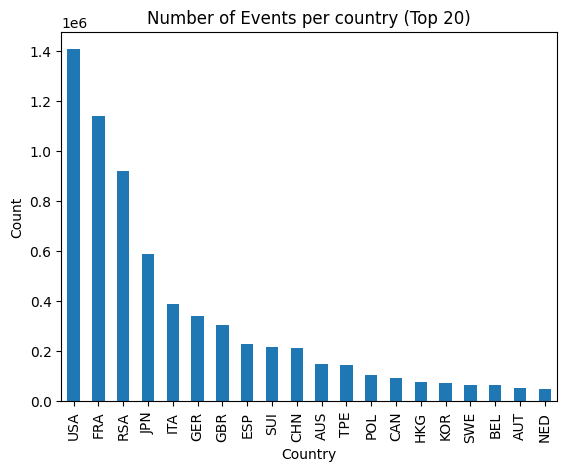

In [13]:
df['Event country code'].value_counts().head(20).plot(kind='bar',title='Number of Events per country (Top 20)',ylabel='Count',xlabel='Country')

In [14]:
if os.path.exists('/content/dfLAT.csv'):
  dfLAT = pd.read_csv('/content/dfLAT.csv')
else:
  dfLAT = df[df['Event country code']=='LAT']

In [15]:
if os.path.exists('/content/dfLAT.csv'):
  print("File exists")
else:
  dfLAT.to_csv('dfLAT.csv', index=False)


In [16]:
dfLAT.isnull().sum()

,0
Year of event,0
Event dates,0
Event name,0
Event distance/length,0
Event number of finishers,0
Athlete performance,0
Athlete club,1545
Athlete country,0
Athlete year of birth,138
Athlete gender,0


In [17]:
dfLAT.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4979 entries, 312152 to 7285490
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype          
---  ------                     --------------  -----          
 0   Year of event              4979 non-null   int64          
 1   Event dates                4979 non-null   object         
 2   Event name                 4979 non-null   object         
 3   Event distance/length      4979 non-null   object         
 4   Event number of finishers  4979 non-null   int64          
 5   Athlete performance        4979 non-null   object         
 6   Athlete club               3434 non-null   object         
 7   Athlete country            4979 non-null   object         
 8   Athlete year of birth      4841 non-null   float64        
 9   Athlete gender             4979 non-null   object         
 10  Athlete age category       4841 non-null   object         
 11  Athlete average speed      4979 non-null   object    

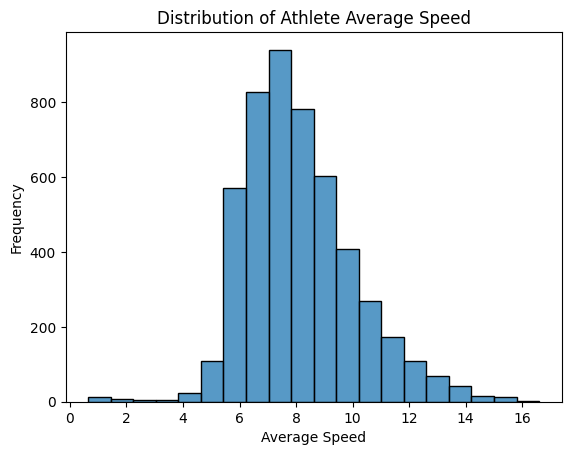

In [18]:
sns.histplot(dfLAT['Average Speed (km/h)'], bins=20 )
plt.title('Distribution of Athlete Average Speed')
plt.xlabel('Average Speed')
plt.ylabel('Frequency')
plt.show()

In [19]:
dfLAT.describe().T

,count,mean,std,min,25%,50%,75%,max
Year of event,4979.0,2015.253665,7.546489,1984.0,2014.0,2017.0,2020.0,2022.0
Event number of finishers,4979.0,91.831492,46.13453,1.0,57.0,101.0,117.0,187.0
Athlete year of birth,4841.0,1977.377815,12.185634,1914.0,1972.0,1980.0,1986.0,2009.0
Athlete ID,4979.0,579155.796947,439376.138688,172.0,216350.0,424535.0,817083.0,1635270.0
Performance,4979,0 days 11:22:42.317935328,0 days 15:48:24.718377504,0 days 03:00:42,0 days 07:35:40.500000,0 days 09:54:50,0 days 12:32:18,12 days 00:00:00
Distance,4979.0,81.435634,38.549203,45.08,55.0,80.0,101.0,1245.025
Average Speed (km/h),4979.0,8.122733,1.953344,0.645833,6.728738,7.820349,9.239532,16.602103


In [20]:
dfLAT['Event name'].value_counts()

,count
Event name,
Skrējiens Rīga–Valmiera (LAT),1134
Siguldas kalnu maratons 70 km (LAT),571
Siguldas kalnu maratons 53 km (LAT),454
Cesis Eco Trail (LAT),362
Siguldas kalnu maratons 55 km (LAT),242
"Skrējiens Rīga–Valmiera, Latvian NC 100km (LAT)",214
Baltic Barefoot Ultramarathon (LAT),202
Enter Gauja Trail East - Rietumi (LAT),187
Daugavpils 50 km race (LAT),159


<Axes: title={'center': 'Number of Athlete by gender'}, ylabel='Athlete gender'>

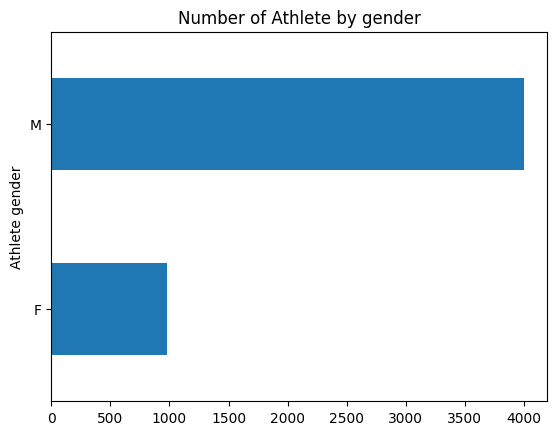

In [21]:
dfLAT.groupby('Athlete gender').size().plot(kind='barh', title='Number of Athlete by gender')

<Axes: xlabel='Year of event', ylabel='Event number of finishers'>

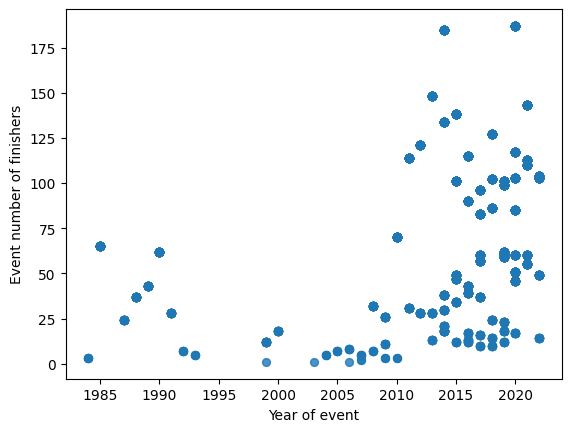

In [22]:
dfLAT.plot(kind='scatter', x='Year of event', y='Event number of finishers', s=32, alpha=.8)

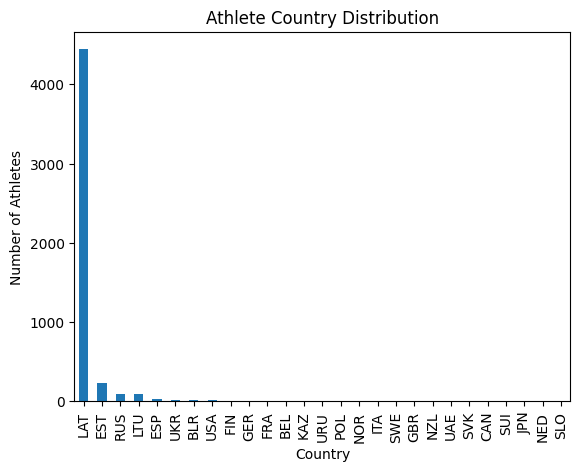

In [23]:
dfLAT['Athlete country'].value_counts().sort_values(ascending=False).plot(kind='bar')
plt.title('Athlete Country Distribution')
plt.xlabel('Country')
plt.ylabel('Number of Athletes')
plt.show()

# Gender Analysis

Text(0.5, 1.0, 'The Number of Race paticipants for Events By gender')

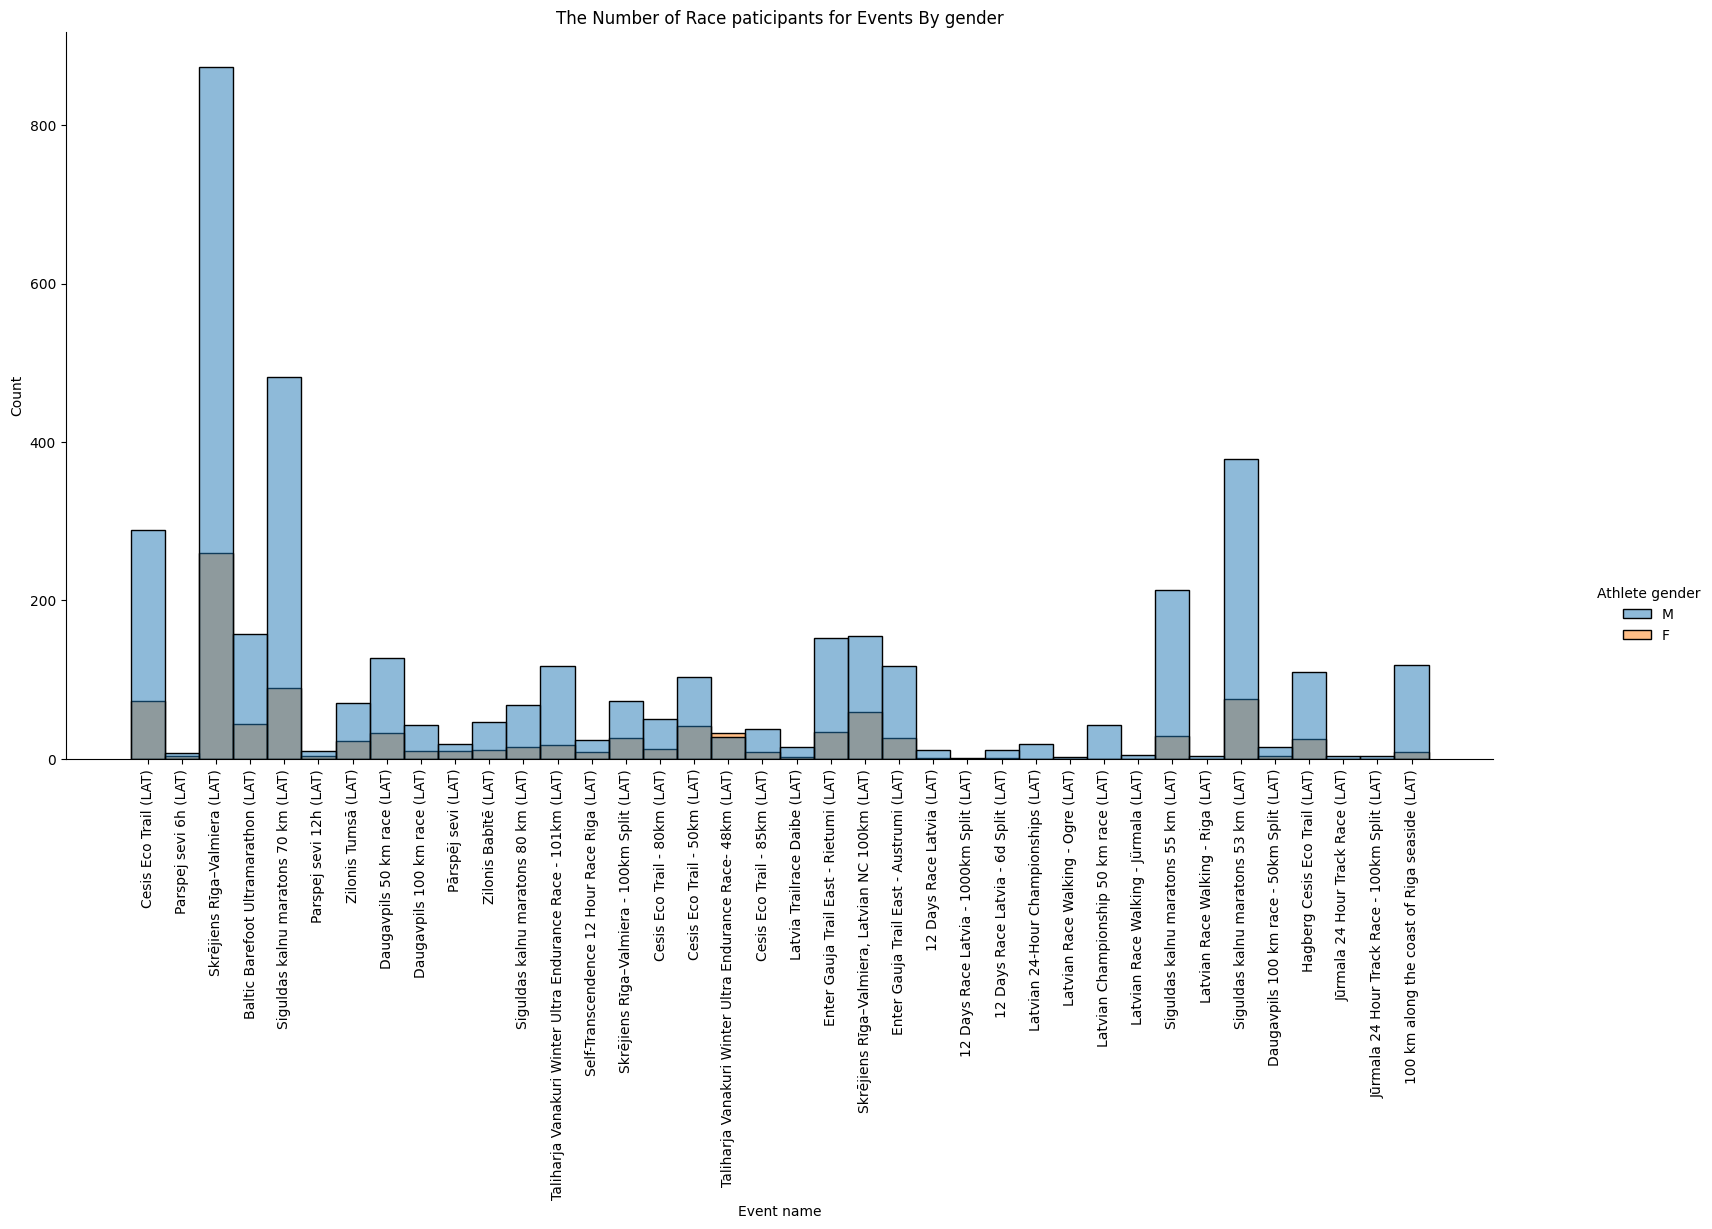

In [24]:
sns.displot(data=dfLAT,kind='hist',x='Event name',hue='Athlete gender',binwidth=10, height=8, aspect=2)
plt.xticks(rotation=90)
plt.title('The Number of Race paticipants for Events By gender')

# Events analysis


<Axes: title={'center': 'Number of Athletes per Event'}, xlabel='Event Name', ylabel='Number of Athletes'>

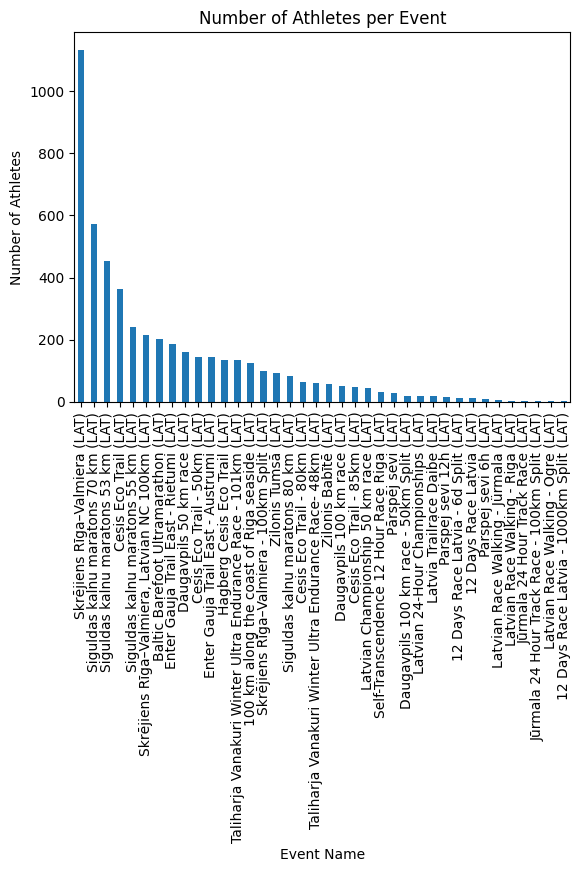

In [25]:
dfLAT['Event name'].value_counts().plot(kind='bar',title='Number of Athletes per Event',xlabel='Event Name',ylabel='Number of Athletes')

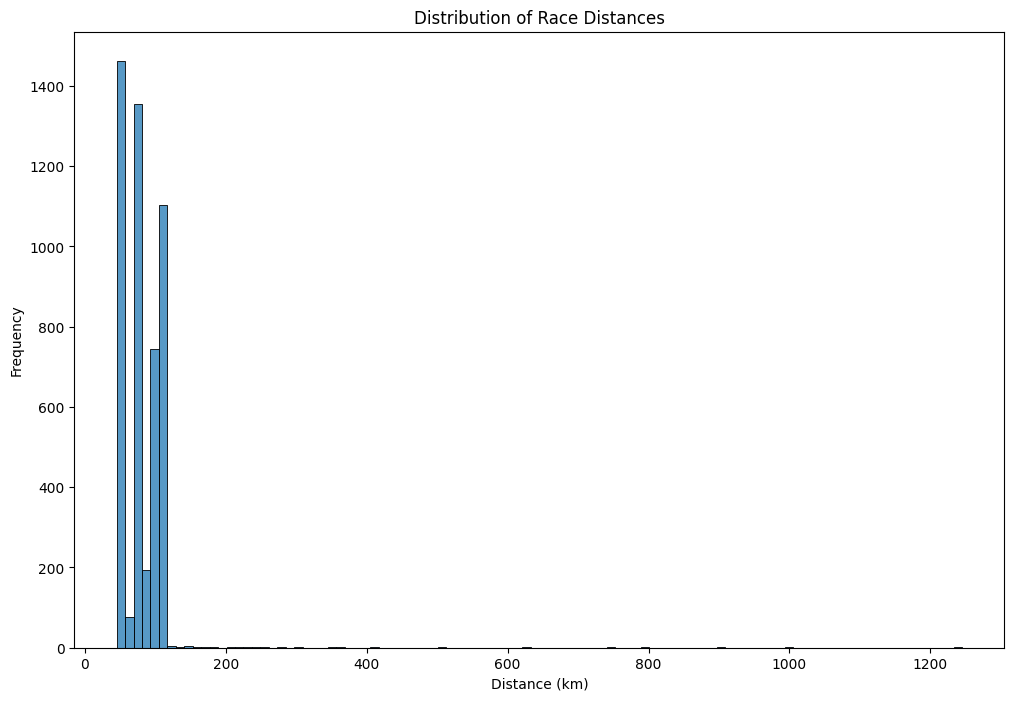

In [26]:
plt.figure(figsize=(12, 8))
sns.histplot(dfLAT['Distance'], bins=100)
plt.title('Distribution of Race Distances')
plt.xlabel('Distance (km)')
plt.ylabel('Frequency')
plt.show()

In [27]:
def categorize_distance(row):
    distance = row['Distance']
    if 40 <= distance < 70:
        return '40km to 70km'
    elif 70 <= distance < 90:
        return '70km to 90km'
    elif 90 <= distance < 120:
        return '90km to 120km'
    elif 120 <= distance < 200:
        return '120km to 200km'
    elif 200 <= distance < 400:
        return '200km to 400km'
    elif 400 <= distance < 800:
        return '400km to 800km'
    elif distance >= 800:
        return 'Over 800km'
    else:
        return 'Unknown'

dfLAT['Distance Category'] = dfLAT.apply(categorize_distance, axis=1)


Text(0.5, 1.0, 'The Number of Race paticipants for Events By gender')

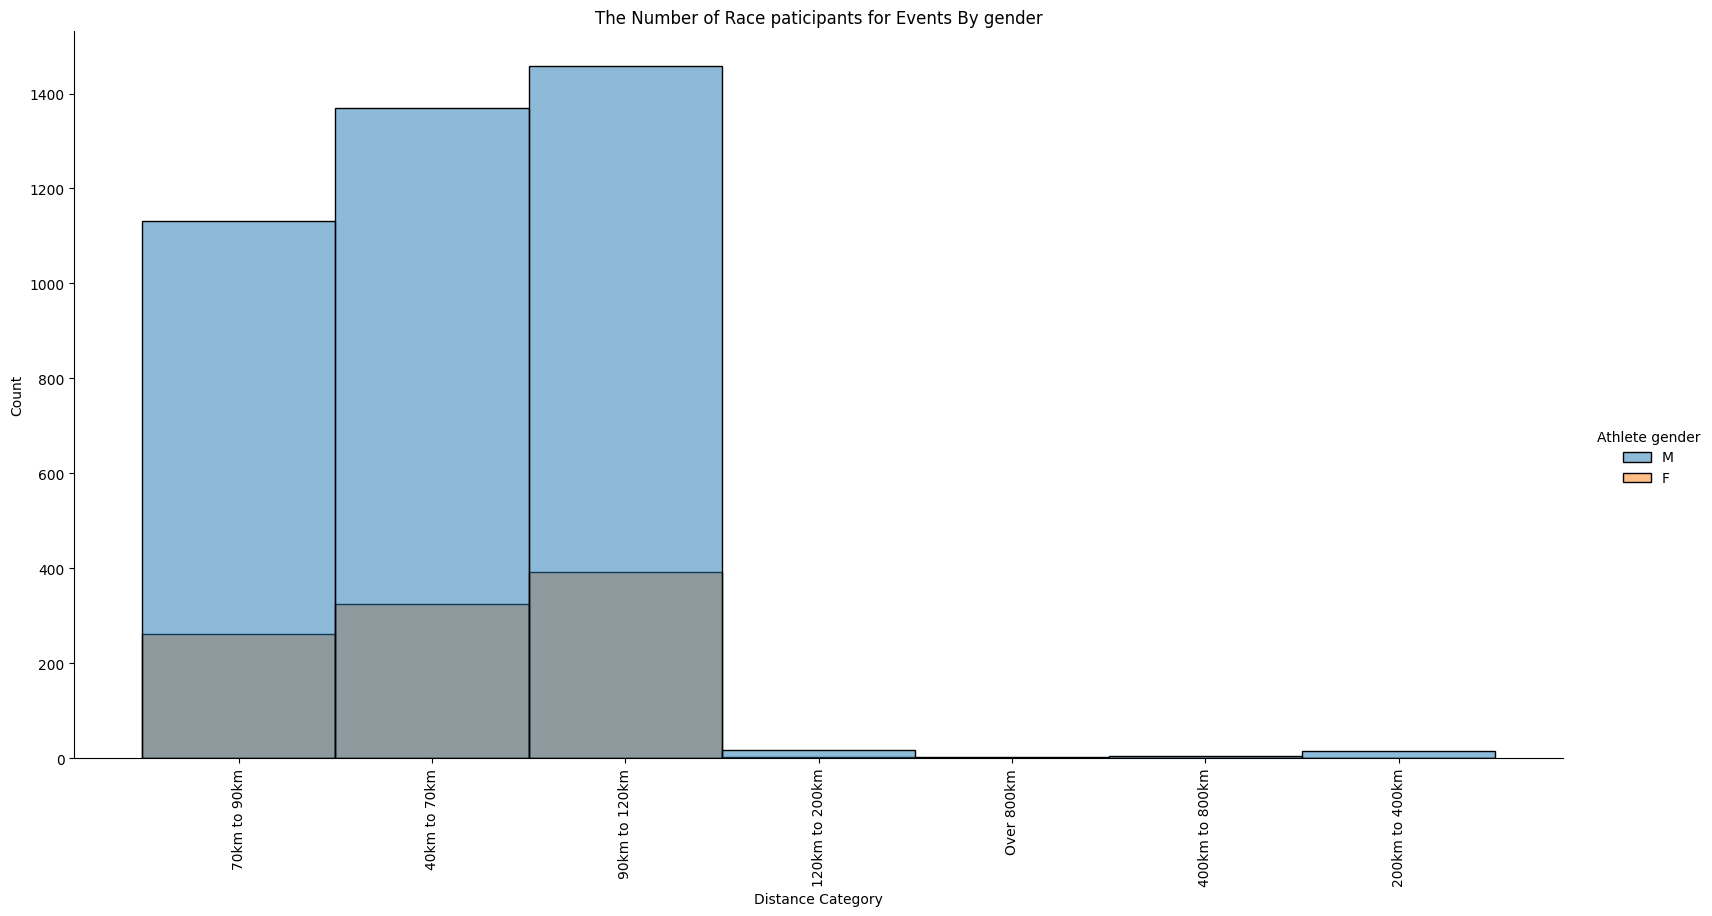

In [28]:
sns.displot(data=dfLAT,kind='hist',x='Distance Category',hue='Athlete gender',binwidth=10, height=8, aspect=2)
plt.xticks(rotation=90)
plt.title('The Number of Race paticipants for Events By gender')

# Age Analysis

In [29]:
dfLAT = dfLAT.dropna(subset=['Athlete year of birth'])

In [30]:
dfLAT['Athlete age']=dfLAT['Year of event']-dfLAT['Athlete year of birth']

Text(0.5, 1.0, 'Distributions of Athlete age')

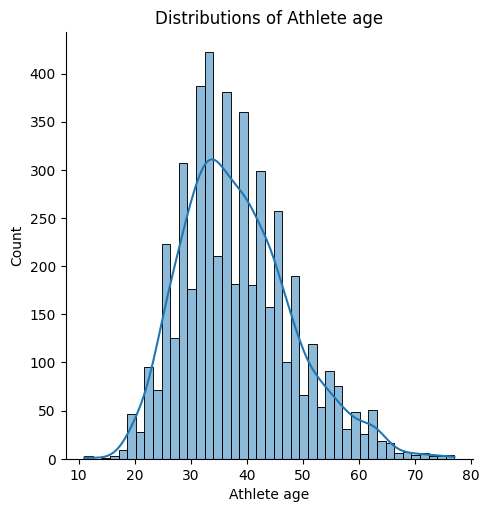

In [31]:
sns.displot(data=dfLAT,x='Athlete age',kind='hist',kde='True')
plt.title("Distributions of Athlete age")

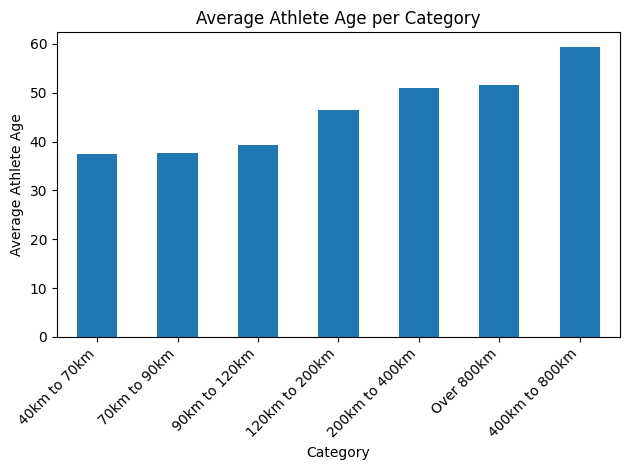

In [32]:
average_age_per_event = dfLAT.groupby('Distance Category')['Athlete age'].mean().sort_values()

average_age_per_event.plot(kind='bar')
plt.title('Average Athlete Age per Category')
plt.xlabel('Category')
plt.ylabel('Average Athlete Age')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

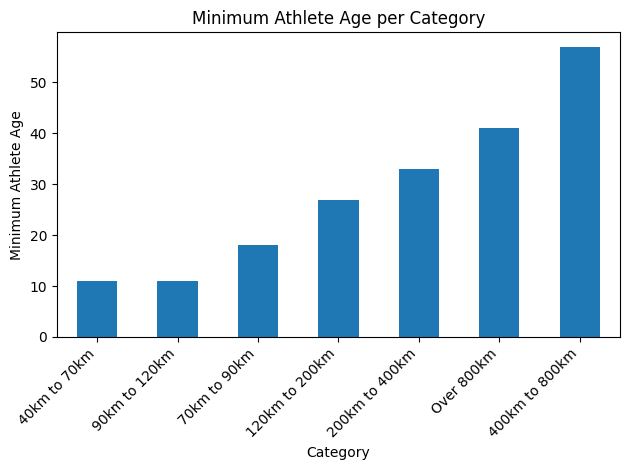

In [33]:
min_age_per_event = dfLAT.groupby('Distance Category')['Athlete age'].min().sort_values()

min_age_per_event.plot(kind='bar')
plt.title('Minimum Athlete Age per Category')
plt.xlabel('Category')
plt.ylabel('Minimum Athlete Age')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

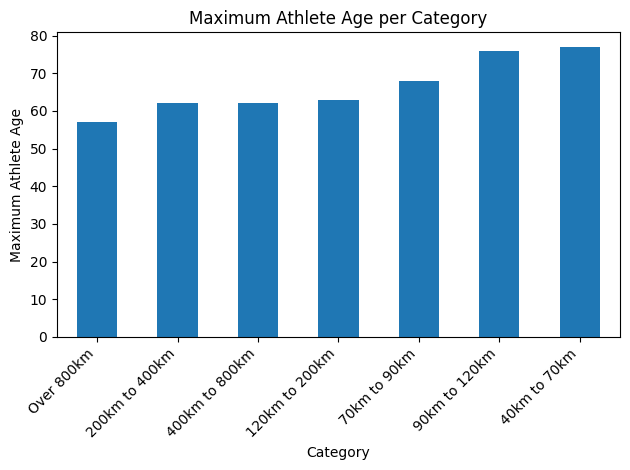

In [34]:
max_age_per_event = dfLAT.groupby('Distance Category')['Athlete age'].max().sort_values()

max_age_per_event.plot(kind='bar')
plt.title('Maximum Athlete Age per Category')
plt.xlabel('Category')
plt.ylabel('Maximum Athlete Age')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Average Speed analysis

Text(0.5, 1.0, 'Distributions of athlete average speed')

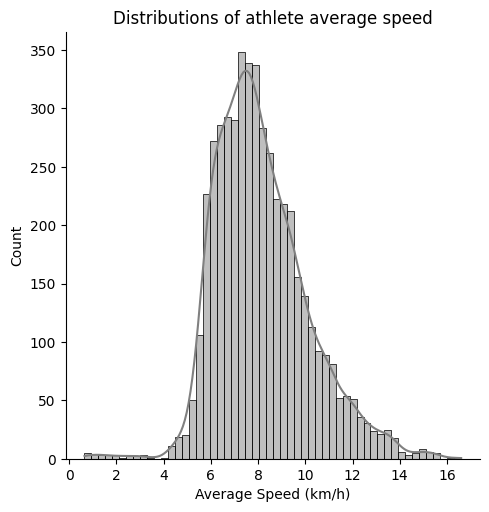

In [35]:
sns.displot(data=dfLAT,x='Average Speed (km/h)',color='grey',kde=True)
plt.title("Distributions of athlete average speed")

In [36]:
age_vs_speed=dfLAT.groupby(['Athlete age category'])['Average Speed (km/h)'].agg(['mean','count']).sort_values(by='mean',ascending=False).query('count>20')
age_vs_speed

,mean,count
Athlete age category,,
M23,8.507314,1395
M45,8.388178,414
M40,8.340977,664
M35,8.339812,730
M50,8.251513,240
MU23,7.970127,130
W35,7.800321,221
W50,7.717633,36
W23,7.528545,438


# **Average speed vs Age**

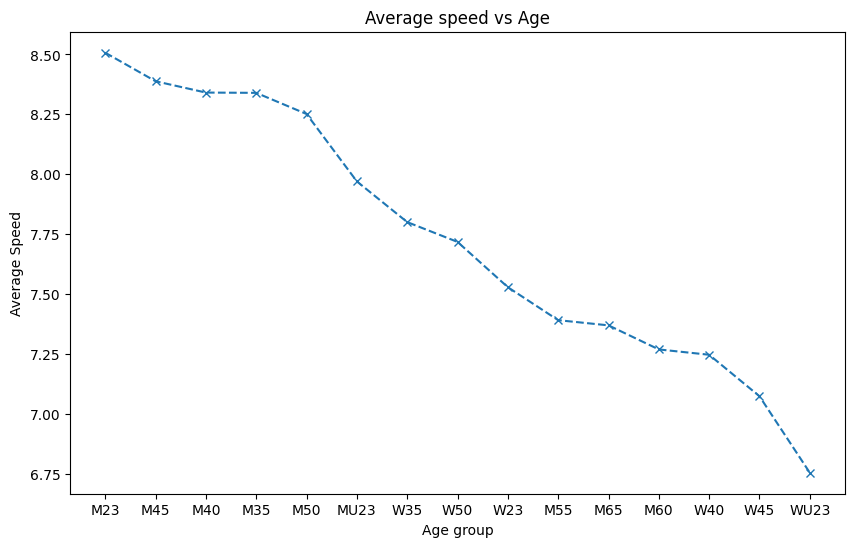

In [37]:
plt.figure(figsize=(10, 6))
plt.plot(age_vs_speed.index, age_vs_speed['mean'], marker='x', linestyle='--')
plt.xlabel('Age group')
plt.ylabel('Average Speed')
plt.title('Average speed vs Age')
plt.show()

In [38]:
distance_gender=dfLAT.groupby(['Distance Category','Athlete gender'])['Average Speed (km/h)'].agg(['mean','count']).sort_values(by='mean',ascending=False)
data=distance_gender.reset_index()
data

,Distance Category,Athlete gender,mean,count
0,40km to 70km,M,8.707422,1337
1,90km to 120km,M,8.456423,1385
2,40km to 70km,F,7.878352,322
3,70km to 90km,M,7.770936,1113
4,90km to 120km,F,7.363848,388
5,70km to 90km,F,7.166165,254
6,120km to 200km,M,6.342376,17
7,120km to 200km,F,5.667347,2
8,Over 800km,M,4.136645,3
9,200km to 400km,M,3.256736,14


# Athlete average speed grouped by Event Distance and Gender

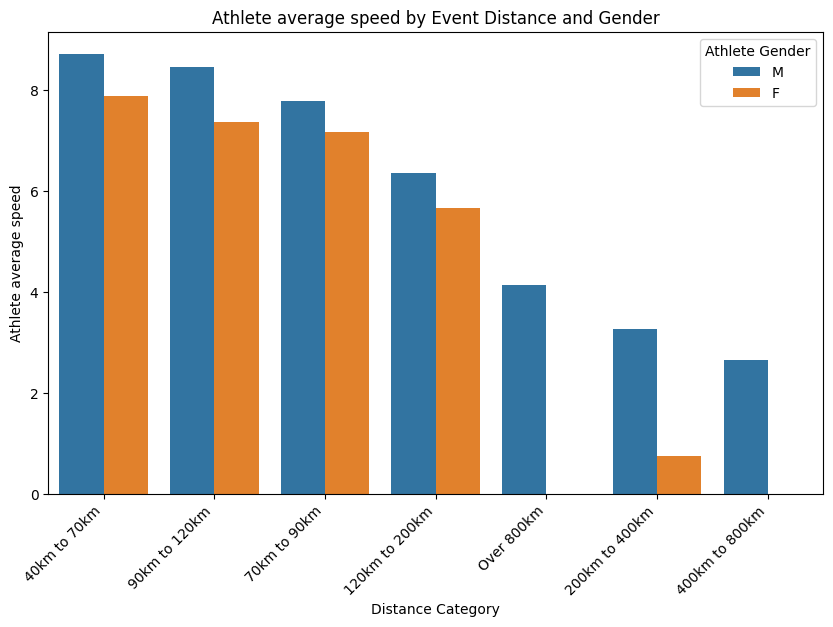

In [39]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Distance Category', y='mean', hue='Athlete gender', data=data)
plt.xlabel('Distance Category')
plt.ylabel('Athlete average speed')
plt.xticks(rotation=45, ha='right')
plt.title('Athlete average speed by Event Distance and Gender')
plt.legend(title='Athlete Gender')
plt.show()

# Analysis on the Most Popular Event Skrējiens Rīga–Valmiera (LAT)

In [41]:
dfEvent = dfLAT[dfLAT['Event name']=='Skrējiens Rīga–Valmiera (LAT)']

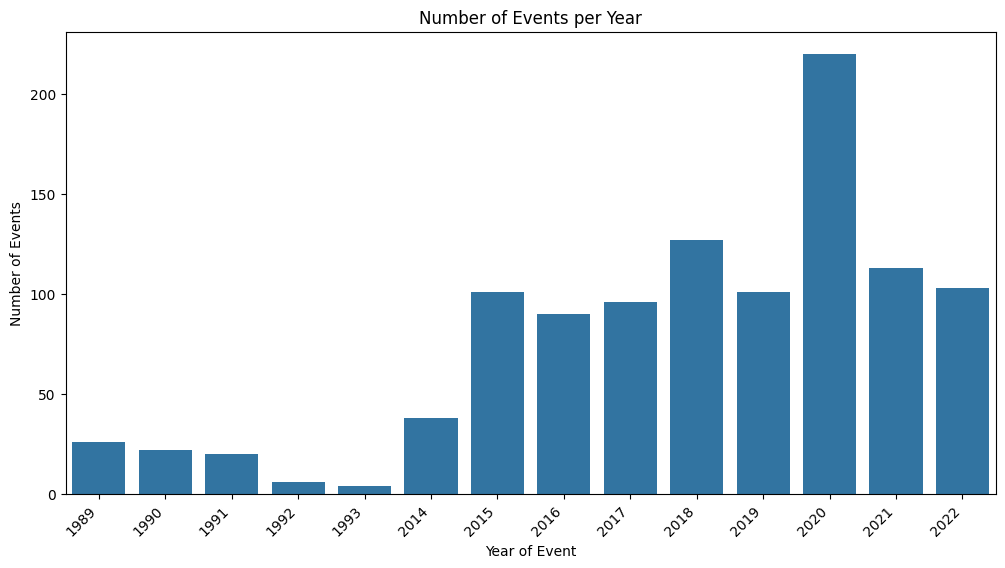

In [42]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Year of event', data=dfEvent)
plt.title('Number of Events per Year')
plt.xlabel('Year of Event')
plt.ylabel('Number of Events')
plt.xticks(rotation=45, ha='right')
plt.show()

<Axes: title={'center': 'Athlete country count'}, xlabel='Country', ylabel='Count'>

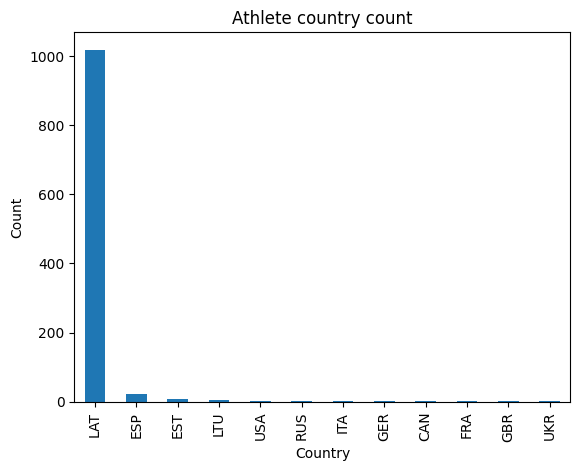

In [43]:
dfEvent['Athlete country'].value_counts().plot(kind='bar',title='Athlete country count',ylabel='Count',xlabel='Country')

<Axes: ylabel='Athlete gender'>

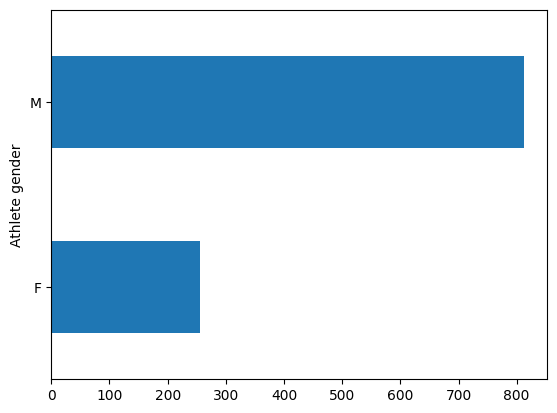

In [44]:
dfEvent.groupby('Athlete gender').size().plot(kind='barh')

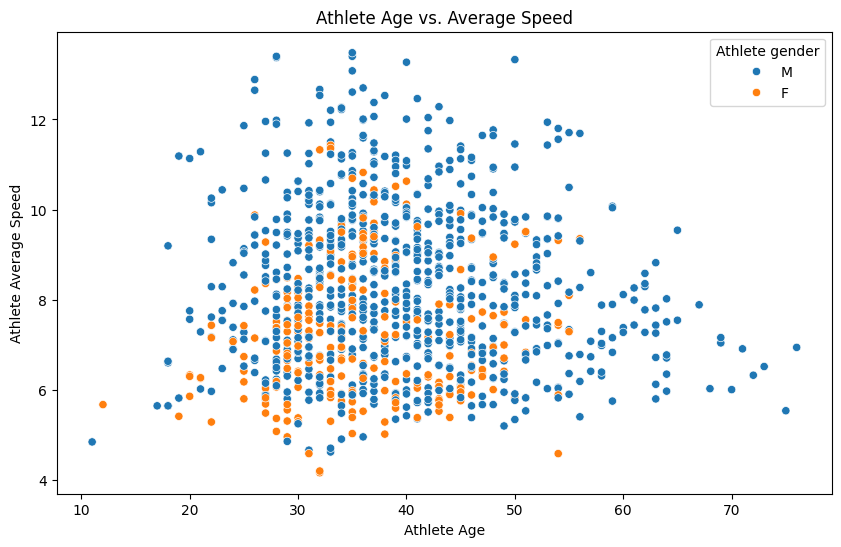

In [45]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Athlete age', y='Average Speed (km/h)', hue='Athlete gender', data=dfEvent)
plt.xlabel('Athlete Age')
plt.ylabel('Athlete Average Speed')
plt.title('Athlete Age vs. Average Speed')
plt.show()

In [46]:
top_athlete_per_year = dfEvent.groupby('Year of event').apply(lambda x: x.nsmallest(1, 'Performance'))

print(top_athlete_per_year[['Year of event', 'Athlete ID', 'Athlete performance']])

                       Year of event  Athlete ID Athlete performance
Year of event                                                       
1989          7123943           1989     1615576          10:07:00 h
1990          7162492           1990     1620616           9:36:37 h
1991          7206368           1991      216334           8:03:45 h
1992          7244790           1992      111276           8:01:38 h
1993          7285486           1993     1635269          10:01:01 h
2014          5956789           2014      185898           9:54:24 h
2015          6291370           2015     1476333           8:35:06 h
2016          783226            2016      424516           8:26:49 h
2017          1278009           2017      212777           8:27:32 h
2018          393628            2018      216289           8:18:11 h
2019          2106796           2019       66095           8:10:50 h
2020          2543908           2020      129264           7:25:02 h
2021          2856066           20

In [47]:
top_athletes_per_year = dfEvent.groupby('Year of event').apply(lambda x: x.nsmallest(3, 'Performance'))

print(top_athletes_per_year[['Year of event', 'Athlete ID', 'Athlete performance']])

                       Year of event  Athlete ID Athlete performance
Year of event                                                       
1989          7123943           1989     1615576          10:07:00 h
              7123944           1989     1615577          10:21:12 h
              7123945           1989     1615578          10:24:15 h
1990          7162492           1990     1620616           9:36:37 h
              7162498           1990     1052345          10:21:52 h
              7162499           1990     1620622          10:33:30 h
1991          7206368           1991      216334           8:03:45 h
              7206369           1991     1109432           9:11:15 h
              7206370           1991     1588025           9:20:25 h
1992          7244790           1992      111276           8:01:38 h
              7244791           1992     1631332           8:57:42 h
              7244792           1992     1631333           9:32:40 h
1993          7285486           19

In [48]:
top_athletes_per_year['Athlete ID'].value_counts()

,count
Athlete ID,
129264,3
66095,3
216289,2
708527,2
260472,2
338507,1
424516,1
424517,1
151398,1


In [49]:
athlete_participation = dfEvent.groupby('Athlete ID')['Year of event'].count()
athletes_participated_more_than_once = athlete_participation[athlete_participation > 1].count()
print(f"Number of athletes who participated more than once: {athletes_participated_more_than_once}")

total_athletes = len(dfEvent['Athlete ID'].unique())
print(f"Total number of unique athletes: {total_athletes}")

Number of athletes who participated more than once: 224
Total number of unique athletes: 589


# Analysis on athlete

In [50]:
# Get athlete from Latvia with most competitions

athlete_competitions = df[df['Athlete country'] == 'LAT'].groupby('Athlete ID')['Event name'].count().reset_index()
athlete_competitions = athlete_competitions.rename(columns={'Event name': 'Number of Competitions'})
most_competitions_athlete = athlete_competitions.loc[athlete_competitions['Number of Competitions'].idxmax()]

athlete_id = most_competitions_athlete['Athlete ID']

athlete_stats = df[df['Athlete ID'] == athlete_id]

athlete_stats['Distance Category'] = athlete_stats.apply(categorize_distance, axis=1)

In [51]:
athlete_stats

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,Event country code,Performance,Distance,Average Speed (km/h),Distance Category
136793,2018,2018-04-27,Sri Chinmoy 10 Day Race (USA),10d,51,593.526 km,NaN,LAT,1942.0,M,M75,2.473,111276,USA,10 days 00:00:00,593.526,2.473025,400km to 800km
136843,2018,2018-04-23,Sri Chinmoy 10 Day Race - 6d Split (USA),6d,51,369.505 km,NaN,LAT,1942.0,M,M75,2.566,111276,USA,6 days 00:00:00,369.505,2.566007,200km to 400km
136899,2018,2018-04-19,Sri Chinmoy 10 Day Race - 48h Split (USA),48h,51,141.622 km,NaN,LAT,1942.0,M,M75,2.95,111276,USA,2 days 00:00:00,141.622,2.950458,120km to 200km
563531,2018,2018-09-22,Parspej sevi 12h (LAT),12h,14,64.390 km,NaN,LAT,1942.0,M,M75,5.366,111276,LAT,0 days 12:00:00,64.390,5.365833,40km to 70km
751703,2016,2016-04-29,Sri Chinmoy 10 Day Race (USA),10d,47,643.737 km,NaN,LAT,1942.0,M,M70,2.682,111276,USA,10 days 00:00:00,643.737,2.682237,400km to 800km
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7330203,1995,1995-09-17,Sri Chinmoy Ultra Trio 1300 Mile Race - 6d Spl...,6d,3,791.797 km,*Riga,LAT,1942.0,M,M50,5499.0,111276,USA,6 days 00:00:00,791.797,5.498590,400km to 800km
7330206,1995,1995-09-13,Sri Chinmoy Ultra Trio 1300 Mile Race - 48h Sp...,48h,3,346.008 km,*Riga,LAT,1942.0,M,M50,7209.0,111276,USA,2 days 00:00:00,346.008,7.208500,200km to 400km
7330209,1995,1995-09-29,Sri Chinmoy Ultra Trio 1300 Mile Race - 1000km...,1000km,1,7d 20:59:22 h,*Riga,LAT,1942.0,M,M50,5291.0,111276,USA,7 days 20:59:22,1000.000,5.291301,Over 800km
7353949,1995,1995-05-14,Sri Chinmoy 7 Day Race (USA),7d,32,930.200 km,*Riga,LAT,1942.0,M,M50,5537.0,111276,USA,7 days 00:00:00,930.200,5.536905,Over 800km


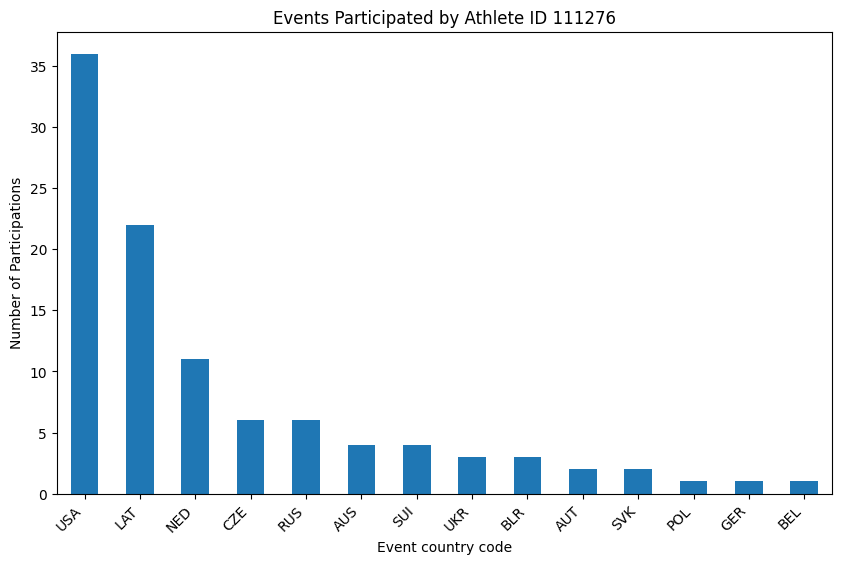

In [57]:
event_counts = athlete_stats['Event country code'].value_counts()

plt.figure(figsize=(10, 6))
event_counts.plot(kind='bar')
plt.title(f'Events Participated by Athlete ID {athlete_id}')
plt.xlabel('Event country code')
plt.ylabel('Number of Participations')
plt.xticks(rotation=45, ha='right')
plt.show()

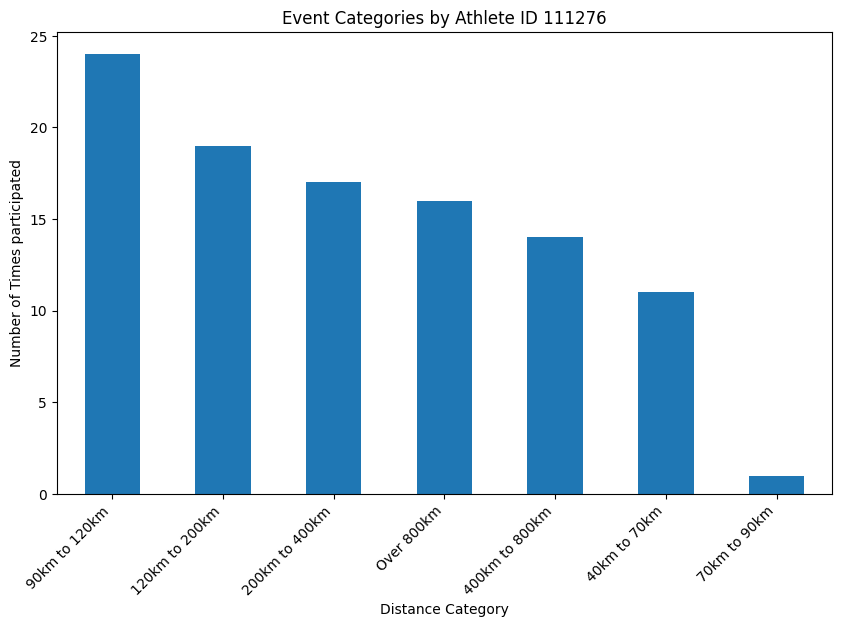

In [59]:
event_counts = athlete_stats['Distance Category'].value_counts()

plt.figure(figsize=(10, 6))
event_counts.plot(kind='bar')
plt.title(f'Event Categories by Athlete ID {athlete_id}')
plt.xlabel('Distance Category')
plt.ylabel('Number of Times participated')
plt.xticks(rotation=45, ha='right')
plt.show()

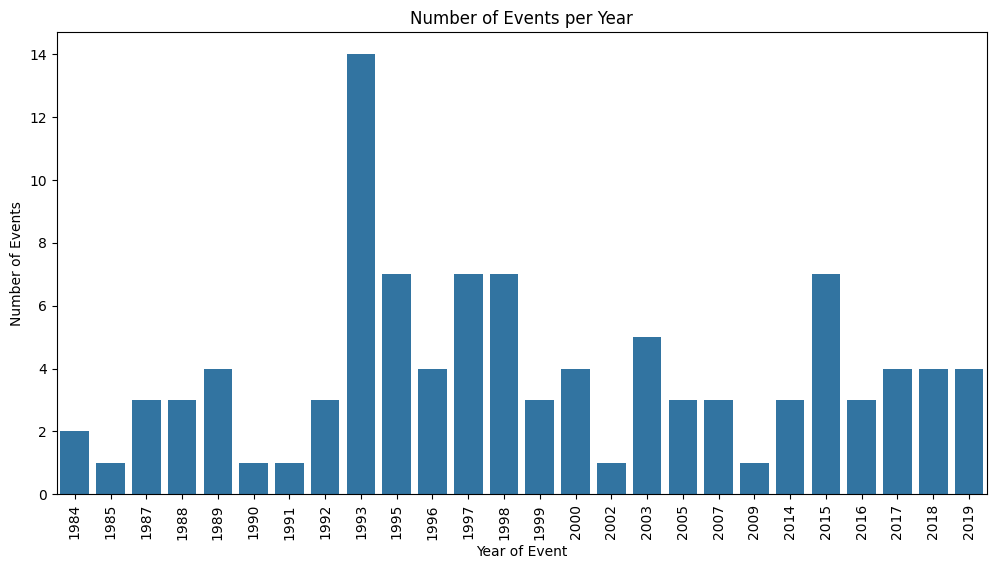

In [52]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Year of event', data=athlete_stats)
plt.title('Number of Events per Year')
plt.xlabel('Year of Event')
plt.ylabel('Number of Events')
plt.xticks(rotation=90)
plt.show()

In [53]:
data_athlete = pd.DataFrame({
    'Year': athlete_stats['Event dates']})

for category in athlete_stats['Distance Category'].unique():
    data_athlete[category] = (athlete_stats[athlete_stats['Distance Category'] ==  category]['Average Speed (km/h)'])

dfl = pd.melt(data_athlete, ['Year'])


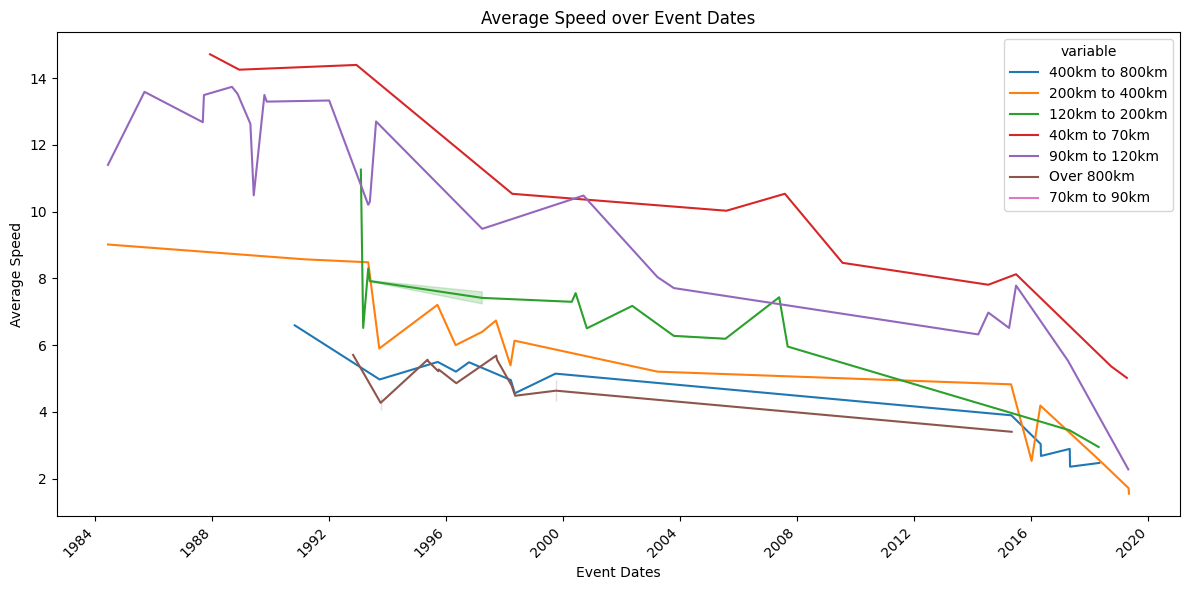

In [54]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=dfl, x='Year', y='value', hue='variable')
plt.xlabel('Event Dates')
plt.ylabel('Average Speed')
plt.title('Average Speed over Event Dates')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()